In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [24]:
pd.set_option('display.max_colwidth', 1000)

In [25]:
kaiser_df=pd.read_csv("Kaiser_df.csv")
kaiser_df.head()

,ReviewID,ReviewTime,Review
0,5.862670e+17,Thu Apr 09 20:37:18 +0000 2015,tougher vaccine law calif clear first hurdle
1,5.862600e+17,Thu Apr 09 20:11:29 +0000 2015,new sort extracurricular activity seeing patient
2,5.862390e+17,Thu Apr 09 18:46:24 +0000 2015,houston firefighter another tool disposal answering call digital doctor
3,5.861820e+17,Thu Apr 09 15:00:25 +0000 2015,montana expand medicaid program moderate revived idea
4,5.861590e+17,Thu Apr 09 13:30:44 +0000 2015,rand paul campaign first day abortion budget


In [26]:
kaiser_string = " ".join(review for review in kaiser_df["Review"])
kaiser_string[0:20]

'tougher vaccine law '

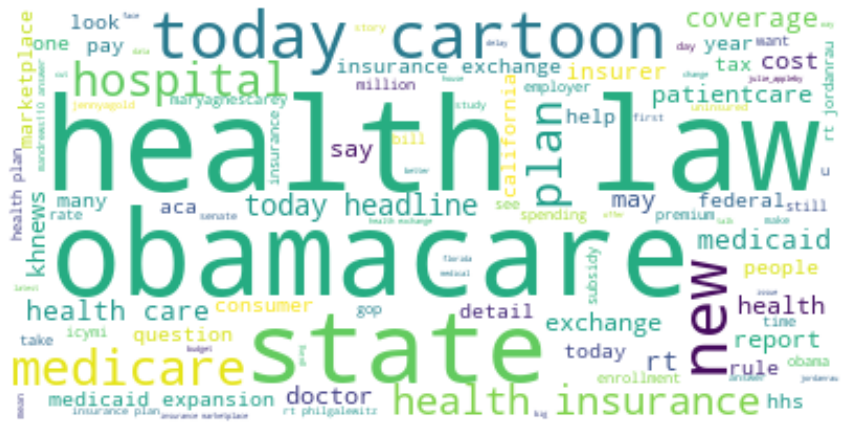

In [6]:
kaiser_wordcloud = WordCloud(background_color="white", 
                              max_words=100, 
                             ).generate(kaiser_string)

# view the wordcloud
plt.figure(figsize=(15,8) )
plt.imshow(kaiser_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
from collections import Counter
k_words=kaiser_string.split()
k_word_freq=Counter(k_words)
five_most_common=k_word_freq.most_common(5)
five_most_common    

[('health', 865),
 ('today', 383),
 ('insurance', 378),
 ('law', 344),
 ('rt', 321)]

In [29]:
# create a Pandas dataframe containing the tokens 
# (words) and their frequencies
k_freq_df = pd.DataFrame.from_dict(k_word_freq, orient='index').reset_index()

# rename the columns to "word" and "freq"
k_freq_df.columns=["word", "freq"]

# sort the dataframe so that the most frequent word is 
# at the top and view the first 3 rows
k_freq_df.sort_values(by="freq", ascending=False)[:10]

,word,freq
41,health,865
207,today,383
62,insurance,378
2,law,344
37,rt,321
51,obamacare,318
98,plan,240
153,care,234
110,medicare,219
431,exchange,219


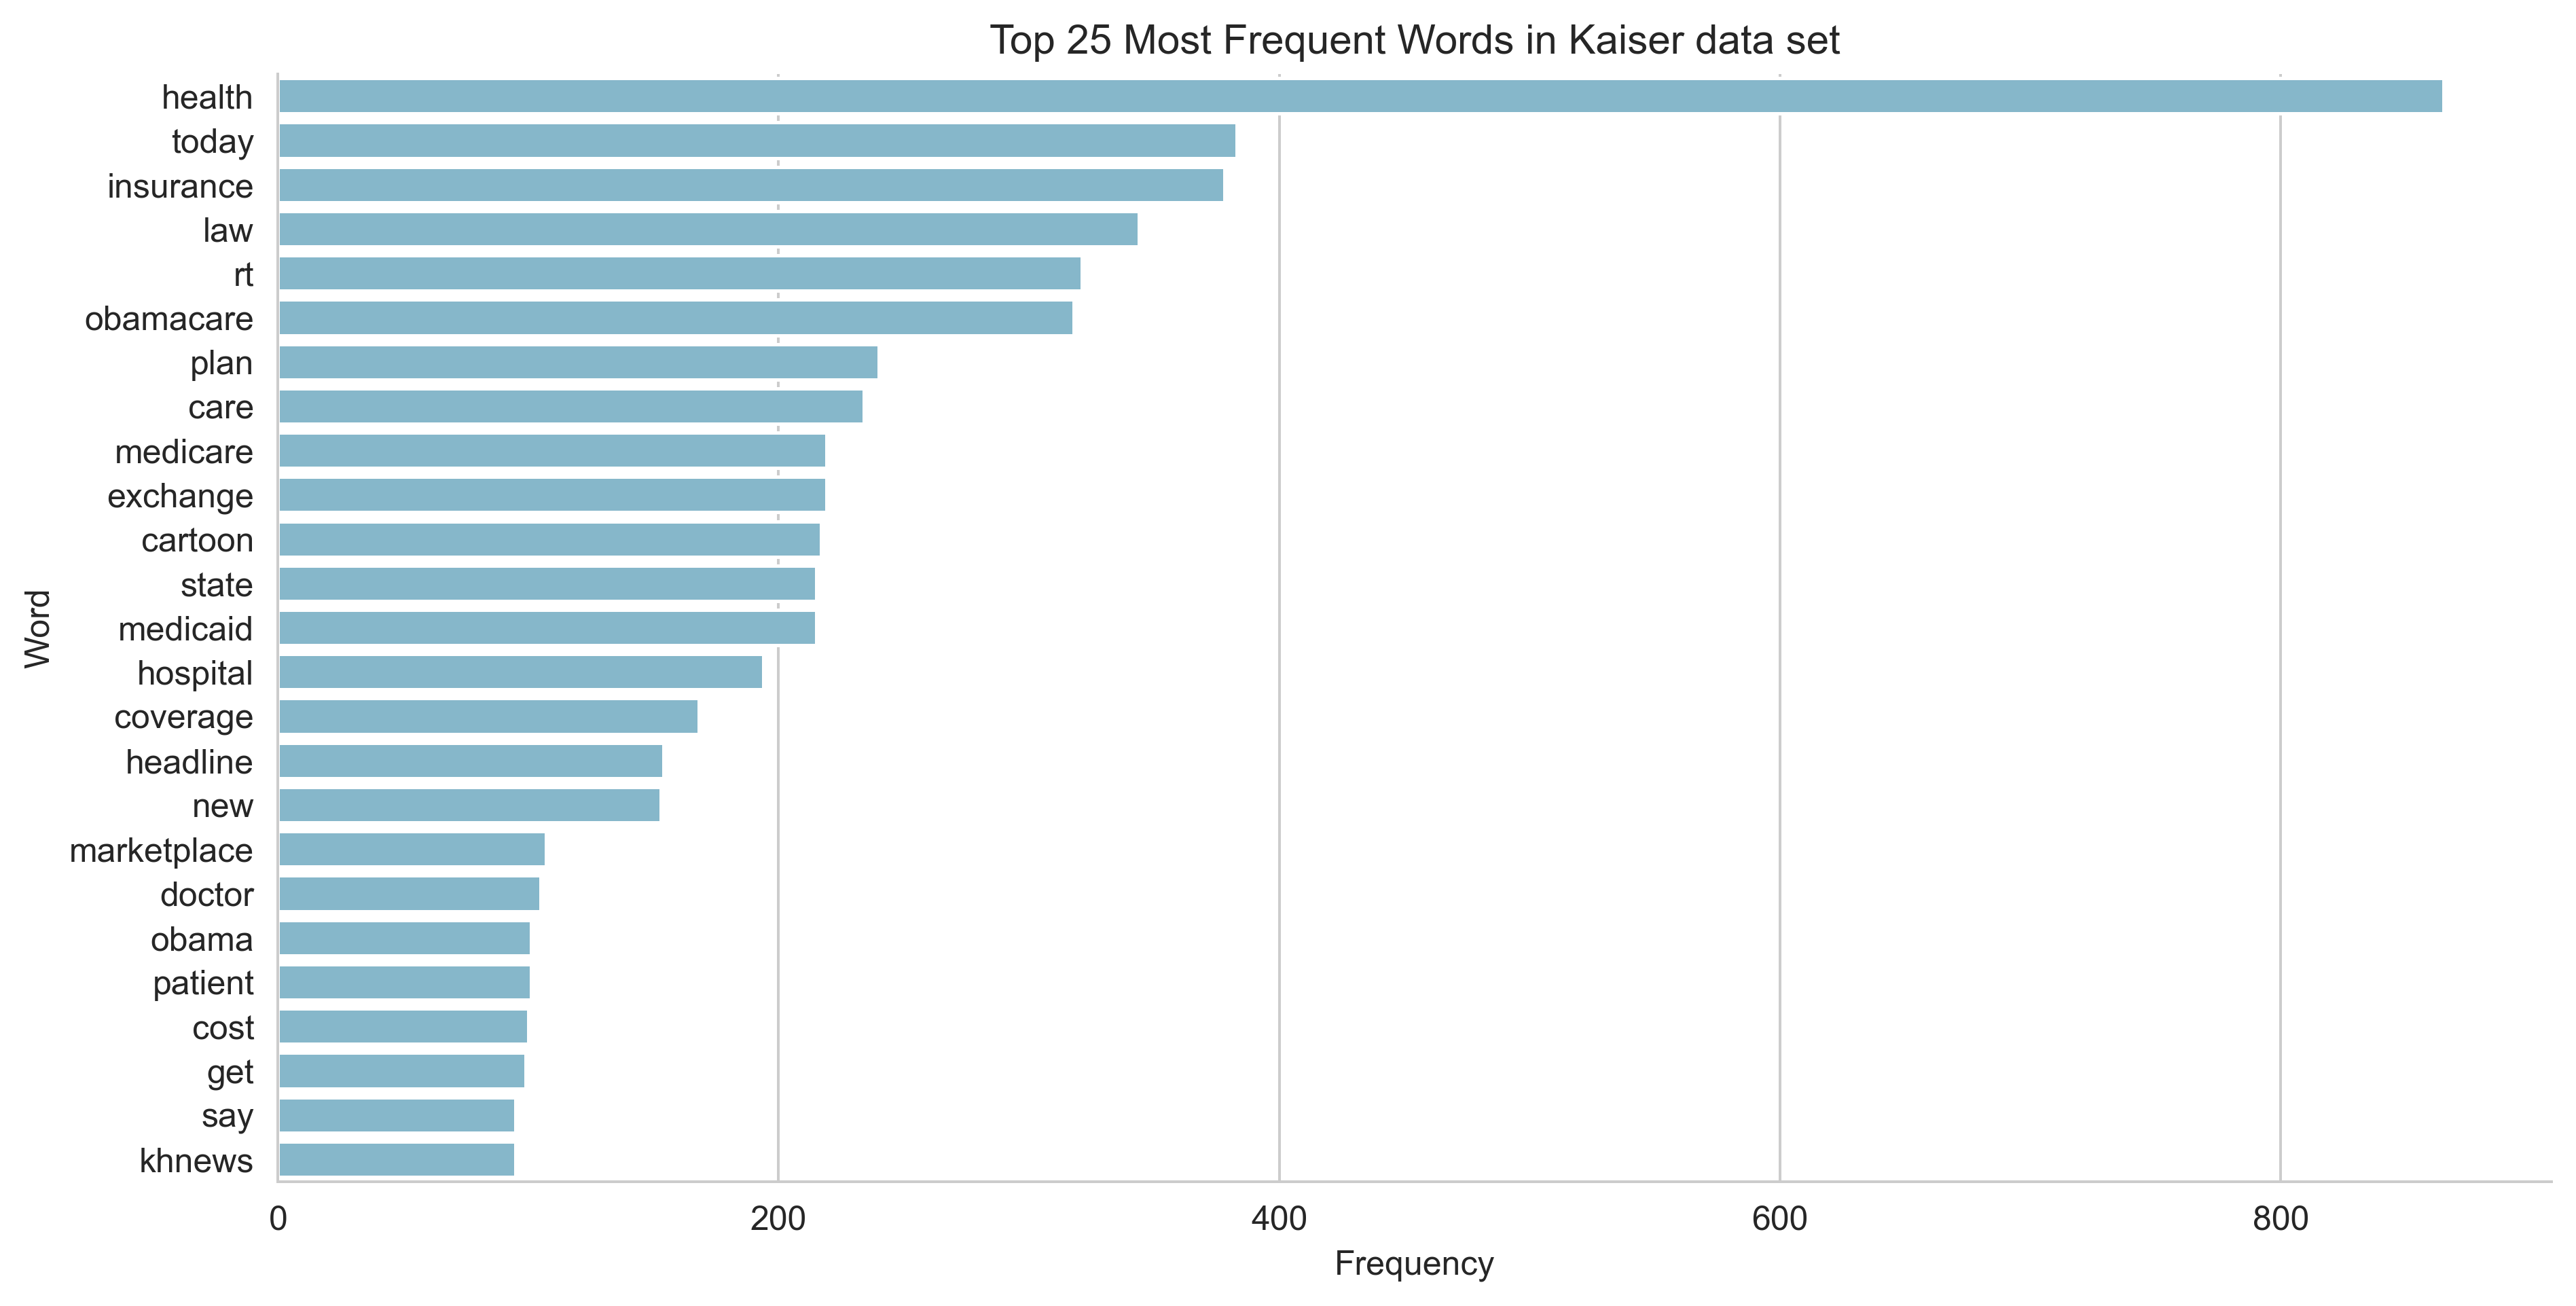

In [30]:
import seaborn as sns
sns.set_style("whitegrid");   # chart background style
plt.rcParams['figure.dpi'] = 360
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=k_freq_df.sort_values(by="freq", ascending=False).head(25),
            y="word",
            x="freq", 
            color='#7bbcd5')
plt.ylabel("Word")
plt.xlabel("Frequency")
plt.title("Top 25 Most Frequent Words in Kaiser data set")
sns.despine()

In [10]:
#color palette
colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c']

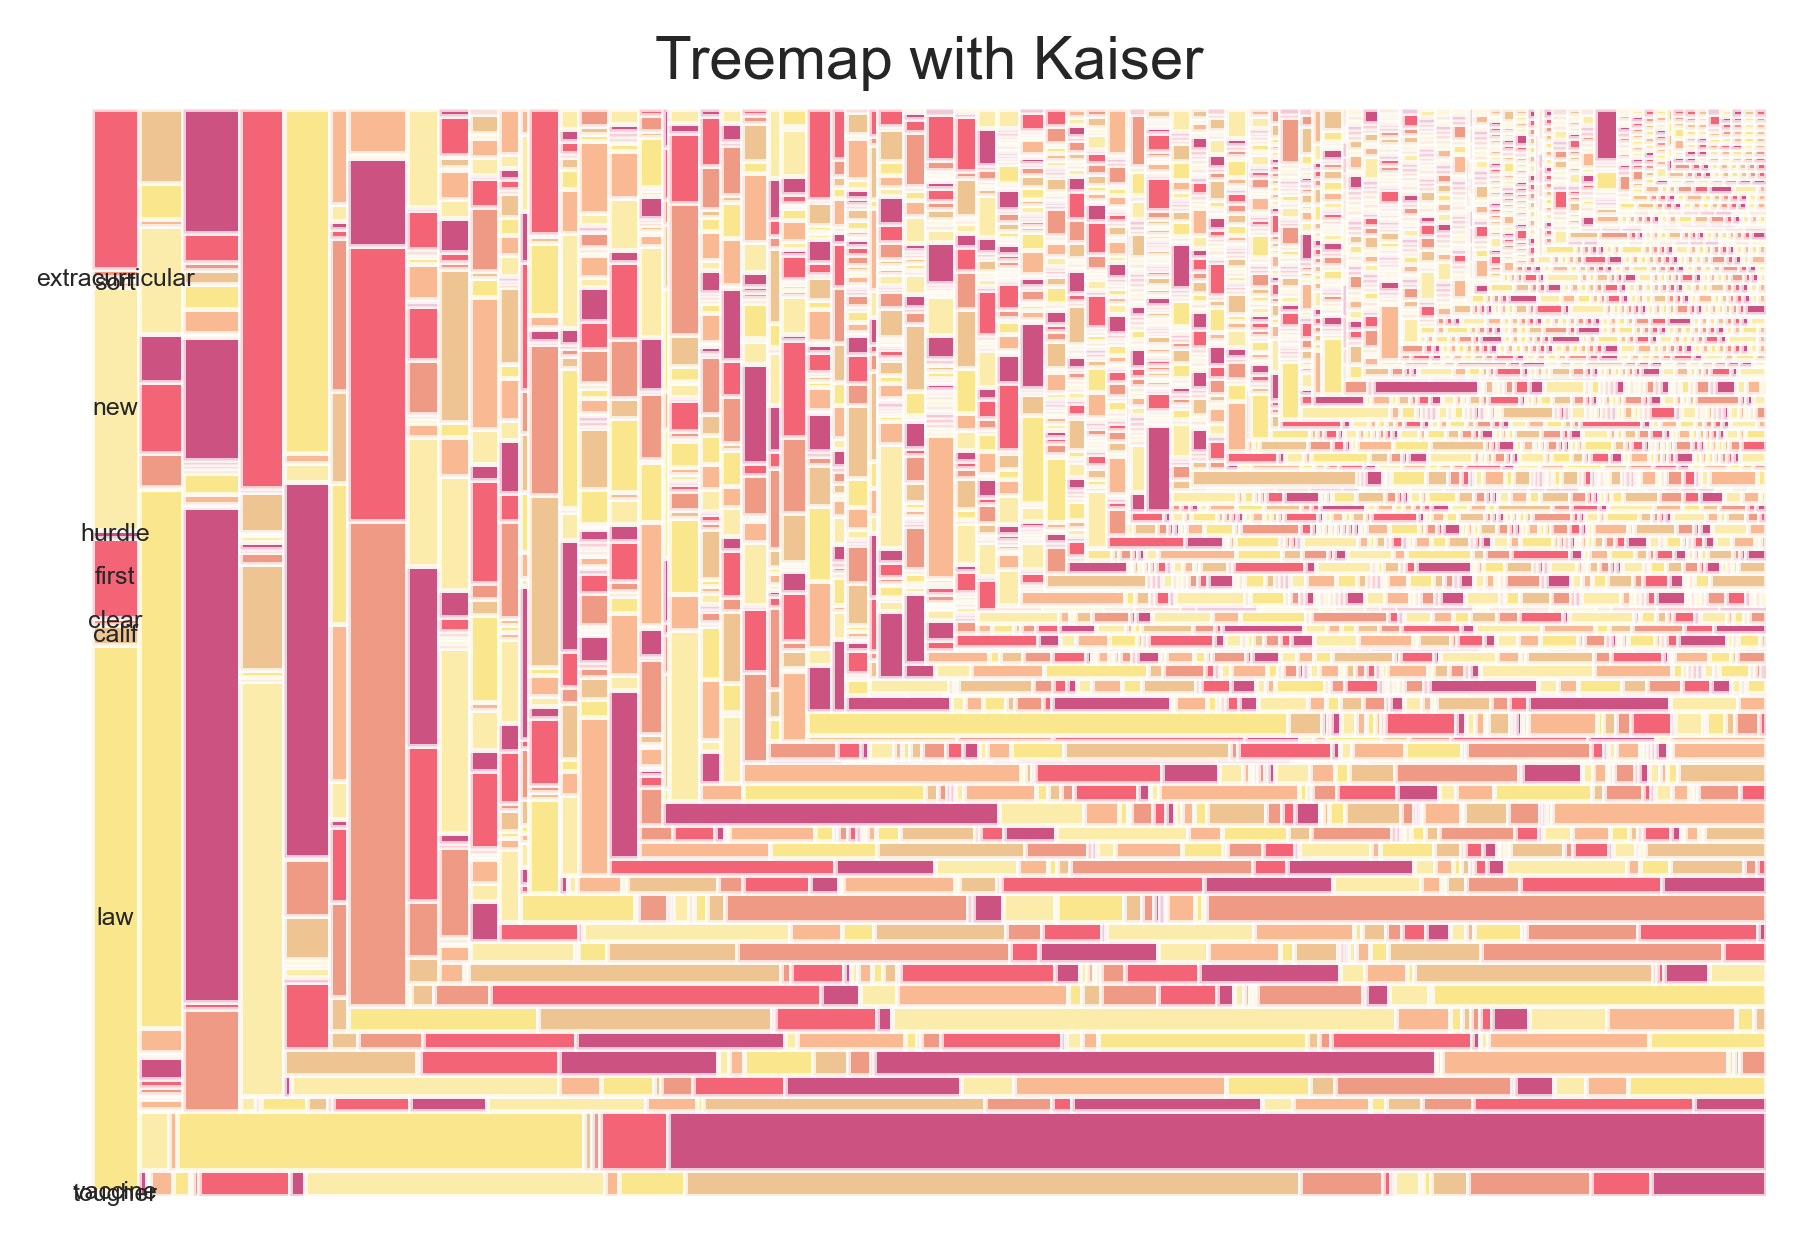

In [16]:
# TreeMap
import squarify
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= k_freq_df["freq"].values# proportions of the categories
label=k_freq_df["word"][:10]
squarify.plot(sizes=sizes, label=label, alpha=0.7,color=colors, text_kwargs={'fontsize':5}).set(title='Treemap with Kaiser')
plt.axis('off')
plt.show()